In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('GOOG.csv')

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [5]:
df.isnull().sum() #checking for any null values

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
print("date datatype - ",type(df['date'][0]))

date datatype -  <class 'str'>


In [7]:
print(df['date'][0])

2016-06-14 00:00:00+00:00


In [8]:
df['date']=pd.to_datetime(df.date) #changing str to datetime

In [9]:
df['date']=df['date'].dt.date #removing time from date

In [10]:
print(df['date'][0])

2016-06-14


In [11]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [12]:
df=df.drop(['symbol'],axis=1)
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [13]:
# df=df[-255:] #taking only one year stock
# df.shape

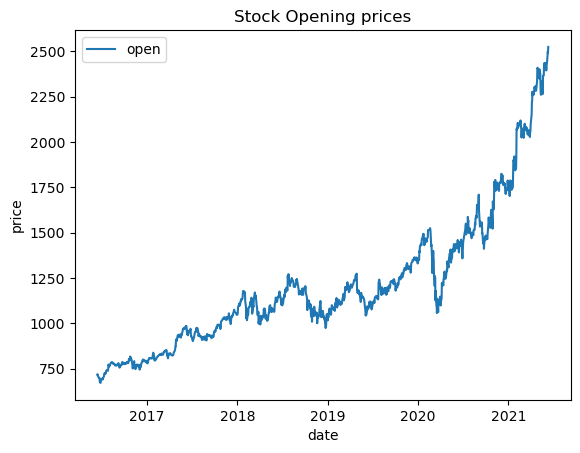

In [14]:
plt.plot(df.date,df.open,label='open')

plt.title('Stock Opening prices')
plt.xlabel('date')
plt.ylabel('price')

plt.legend()
plt.show()

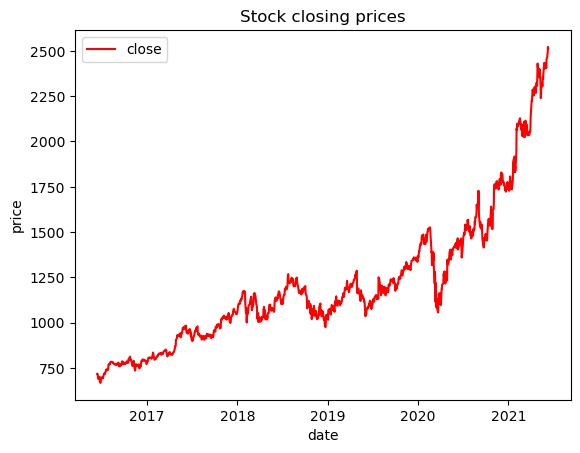

In [15]:
plt.plot(df.date,df.close,label='close',color='red')

plt.title('Stock closing prices')
plt.xlabel('date')
plt.ylabel('price')

plt.legend()
plt.show()

In [16]:
# separating required data for model
# data=df[['date','close']]
# data.head()

In [17]:
close=df['close']

In [18]:
close=pd.DataFrame(close)

In [19]:
type(close)

pandas.core.frame.DataFrame

In [20]:
close.shape

(1258, 1)

In [21]:
close.describe()

,close
count,1258.000000
mean,1216.317067
std,383.333358
min,668.260000
25%,960.802500
50%,1132.460000
75%,1360.595000
max,2521.600000


In [22]:
prediction_days=50

In [23]:
print(close['close'][prediction_days])

769.64


In [24]:
close['predict']=close['close'].shift(-prediction_days)

In [25]:
close.head()

,close,predict
0,718.27,769.64
1,718.92,769.41
2,710.36,769.54
3,691.72,772.15
4,693.71,769.09


In [26]:
close.tail()

,close,predict
1253,2466.09,NaN
1254,2482.85,NaN
1255,2491.40,NaN
1256,2521.60,NaN
1257,2513.93,NaN


In [27]:
x_train=[]
y_train=[]

In [28]:
#preparing dpendent and independent values
for i in range(len(close)-prediction_days):
    x_train.append(close['close'][i:i+prediction_days])
    y_train.append(close['predict'][i])

In [29]:
x_train[0] #first 50 days stock

0     718.27
1     718.92
2     710.36
3     691.72
4     693.71
5     695.94
6     697.46
7     701.87
8     675.22
9     668.26
10    680.04
11    684.11
12    692.10
13    699.21
14    694.49
15    697.77
16    695.36
17    705.63
18    715.09
19    720.64
20    716.98
21    720.95
22    719.85
23    733.78
24    736.96
25    741.19
26    738.63
27    742.74
28    739.77
29    738.42
30    741.77
31    745.91
32    768.79
33    772.88
34    771.07
35    773.18
36    771.61
37    782.22
38    781.76
39    784.26
40    784.68
41    784.85
42    783.22
43    782.44
44    777.14
45    779.91
46    777.50
47    775.42
48    772.15
49    772.08
Name: close, dtype: float64

In [30]:
y_train[-1]

2513.93

In [31]:
x_train[-1]

1207    2068.63
1208    2137.75
1209    2225.55
1210    2224.75
1211    2249.68
1212    2265.44
1213    2285.88
1214    2254.79
1215    2267.27
1216    2254.84
1217    2296.66
1218    2297.76
1219    2302.40
1220    2293.63
1221    2293.29
1222    2267.92
1223    2315.30
1224    2326.74
1225    2307.12
1226    2379.91
1227    2429.89
1228    2410.12
1229    2395.17
1230    2354.25
1231    2356.74
1232    2381.35
1233    2398.69
1234    2341.66
1235    2308.76
1236    2239.08
1237    2261.97
1238    2316.16
1239    2321.41
1240    2303.43
1241    2308.71
1242    2356.09
1243    2345.10
1244    2406.67
1245    2409.07
1246    2433.53
1247    2402.51
1248    2411.56
1249    2429.81
1250    2421.28
1251    2404.61
1252    2451.76
1253    2466.09
1254    2482.85
1255    2491.40
1256    2521.60
Name: close, dtype: float64

In [32]:
#spliting data in train and test
train_len=int(len(y_train)*0.80)
X_train=x_train[:train_len]
Y_train=y_train[:train_len]
X_test=x_train[train_len:]
Y_test=y_train[train_len:]

In [33]:
x_trainF,y_trainF,x_testF,y_testF=np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)

In [34]:
type(x_trainF)

numpy.ndarray

In [35]:
len(x_trainF)

966

In [36]:
len(x_testF)

242

In [37]:
# print(len(X_train))
# print(len(X_test))

In [38]:
print(len(y_trainF))
print(len(y_testF))

966
242


In [39]:
#using linear regression 
model=LinearRegression()

In [40]:
model.fit(x_trainF,y_trainF)

LinearRegression()

In [41]:
pred=model.predict(x_testF)

In [42]:
l=len(x_testF)
draw=close.iloc[-l:]
draw['predict']=pred

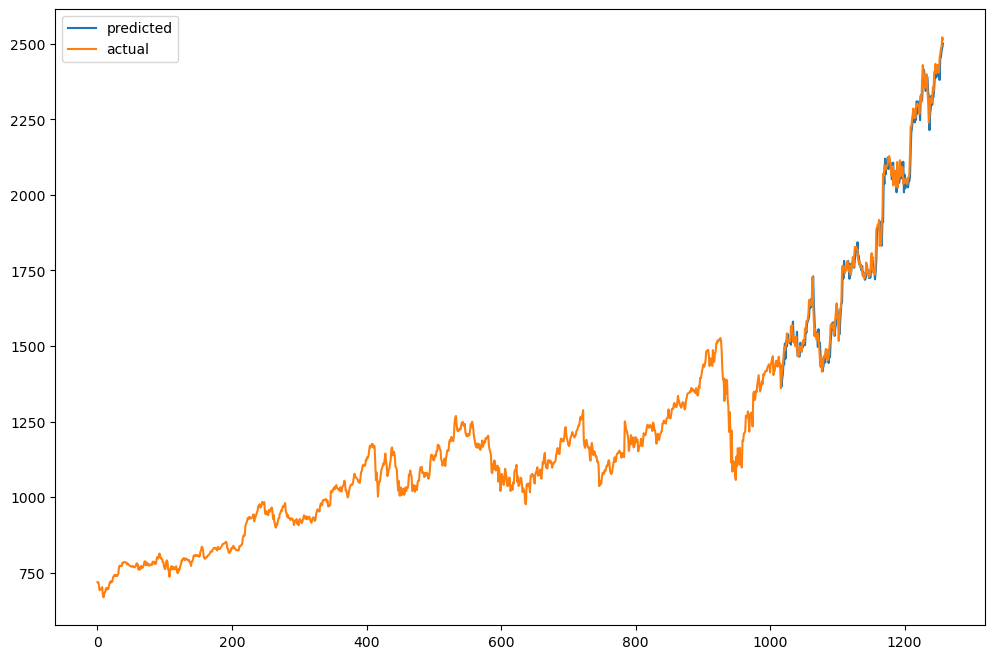

In [43]:
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(draw['predict'],label="predicted")
plt.plot(close['close'],label="actual")
plt.legend(loc="upper left")
plt.show()

In [44]:
print(model.score(x_testF,y_testF))

0.9881169632292728


In [46]:
import pickle
pickle.dump(model,open("SVM_model.pkl",'wb'))